In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from pandas import  DataFrame
from pandas import  concat


data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [2]:
from sklearn.datasets import load_boston
import xgboost
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [4]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


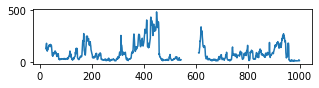

In [5]:
plt.figure(figsize=(5,1))
plt.plot(data['pm2.5'][:1000])

In [6]:
data['cbwd']=data['cbwd'].factorize()[0]

In [7]:
data['pm2.5'] = data['pm2.5'].fillna(method='ffill').fillna(method='bfill')

In [8]:
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,129.0,-21,-11.0,1021.0,0,1.79,0,0
1,2,2010,1,1,1,129.0,-21,-12.0,1020.0,0,4.92,0,0
2,3,2010,1,1,2,129.0,-21,-11.0,1019.0,0,6.71,0,0
3,4,2010,1,1,3,129.0,-21,-14.0,1019.0,0,9.84,0,0
4,5,2010,1,1,4,129.0,-20,-12.0,1018.0,0,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,0,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,0,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,0,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,0,246.72,0,0


In [9]:
data = data[['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5']]
data

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,-21,-11.0,1021.0,0,1.79,0,0,129.0
1,-21,-12.0,1020.0,0,4.92,0,0,129.0
2,-21,-11.0,1019.0,0,6.71,0,0,129.0
3,-21,-14.0,1019.0,0,9.84,0,0,129.0
4,-20,-12.0,1018.0,0,12.97,0,0,129.0
...,...,...,...,...,...,...,...,...
43819,-23,-2.0,1034.0,0,231.97,0,0,8.0
43820,-22,-3.0,1034.0,0,237.78,0,0,10.0
43821,-22,-3.0,1034.0,0,242.70,0,0,10.0
43822,-22,-4.0,1034.0,0,246.72,0,0,8.0


In [10]:
data.head(30)

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
0,-21,-11.0,1021.0,0,1.79,0,0,129.0
1,-21,-12.0,1020.0,0,4.92,0,0,129.0
2,-21,-11.0,1019.0,0,6.71,0,0,129.0
3,-21,-14.0,1019.0,0,9.84,0,0,129.0
4,-20,-12.0,1018.0,0,12.97,0,0,129.0
5,-19,-10.0,1017.0,0,16.10,0,0,129.0
6,-19,-9.0,1017.0,0,19.23,0,0,129.0
7,-19,-9.0,1017.0,0,21.02,0,0,129.0
8,-19,-9.0,1017.0,0,24.15,0,0,129.0
9,-20,-8.0,1017.0,0,27.28,0,0,129.0


In [11]:
days_in = 24
days_out = 1

raw = []

for i in range (days_in,0,-1):
    raw.append(data.shift(i))
    
for i in range (0, days_out):
    raw.append(data.shift(-i))

sum = concat(raw, axis = 1)
sum.dropna(inplace = True)

sum

,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5,DEWP,TEMP,...,Ir,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,pm2.5
24,-21.0,-11.0,1021.0,0.0,1.79,0.0,0.0,129.0,-21.0,-12.0,...,0.0,129.0,-16,-4.0,1020.0,3,1.79,0,0,129.0
25,-21.0,-12.0,1020.0,0.0,4.92,0.0,0.0,129.0,-21.0,-11.0,...,0.0,129.0,-15,-4.0,1020.0,3,2.68,0,0,148.0
26,-21.0,-11.0,1019.0,0.0,6.71,0.0,0.0,129.0,-21.0,-14.0,...,0.0,148.0,-11,-5.0,1021.0,3,3.57,0,0,159.0
27,-21.0,-14.0,1019.0,0.0,9.84,0.0,0.0,129.0,-20.0,-12.0,...,0.0,159.0,-7,-5.0,1022.0,3,5.36,1,0,181.0
28,-20.0,-12.0,1018.0,0.0,12.97,0.0,0.0,129.0,-19.0,-10.0,...,0.0,181.0,-7,-5.0,1022.0,3,6.25,2,0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,-8.0,6.0,1021.0,0.0,5.81,0.0,0.0,35.0,-11.0,5.0,...,0.0,10.0,-23,-2.0,1034.0,0,231.97,0,0,8.0
43820,-11.0,5.0,1022.0,0.0,12.96,0.0,0.0,26.0,-12.0,4.0,...,0.0,8.0,-22,-3.0,1034.0,0,237.78,0,0,10.0
43821,-12.0,4.0,1023.0,0.0,21.90,0.0,0.0,20.0,-21.0,2.0,...,0.0,10.0,-22,-3.0,1034.0,0,242.70,0,0,10.0
43822,-21.0,2.0,1025.0,0.0,31.73,0.0,0.0,8.0,-22.0,0.0,...,0.0,10.0,-22,-4.0,1034.0,0,246.72,0,0,8.0


In [12]:
sum.shape

(43800, 200)

In [13]:
cols = sum.columns[:]
cols

Index(['DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'pm2.5', 'DEWP',
       'TEMP',
       ...
       'Ir', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir',
       'pm2.5'],
      dtype='object', length=200)

In [14]:
sum.columns[-1]

'pm2.5'

In [15]:
from sklearn.preprocessing import MinMaxScaler
values = sum[cols].values.reshape(-1,200)
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [16]:
from sklearn.preprocessing import MinMaxScaler
values = sum.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [17]:
scaled.shape

(43800, 200)

In [18]:
train_size = int(len(scaled) * 0.90)
test_size = int(len(scaled) * 0.10)

In [19]:
train, test = scaled[0:train_size,:], scaled[train_size:,:]
print(len(train),len(test))

39420 4380


In [20]:
sum.shape

(43800, 200)

In [22]:
X_train = train[:,0:-1]
y_train = train[:,199]
X_test = test[:,0:-1]
y_test = test[:,199]

In [24]:
x = scaled [:,0:-1]
y = scaled [:,199]

In [25]:
folds=[]
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=None)


In [26]:
for train, test in tscv.split(x):
    folds.append((train, test))
    print("TRAIN:", train, "TEST:", test)
    train_x, test_x = x[train], x[test]
    train_y, test_y = y[train], y[test]

TRAIN: [   0    1    2 ... 1437 1438 1439] TEST: [1440 1441 1442 ... 2849 2850 2851]
TRAIN: [   0    1    2 ... 2849 2850 2851] TEST: [2852 2853 2854 ... 4261 4262 4263]
TRAIN: [   0    1    2 ... 4261 4262 4263] TEST: [4264 4265 4266 ... 5673 5674 5675]
TRAIN: [   0    1    2 ... 5673 5674 5675] TEST: [5676 5677 5678 ... 7085 7086 7087]
TRAIN: [   0    1    2 ... 7085 7086 7087] TEST: [7088 7089 7090 ... 8497 8498 8499]
TRAIN: [   0    1    2 ... 8497 8498 8499] TEST: [8500 8501 8502 ... 9909 9910 9911]
TRAIN: [   0    1    2 ... 9909 9910 9911] TEST: [ 9912  9913  9914 ... 11321 11322 11323]
TRAIN: [    0     1     2 ... 11321 11322 11323] TEST: [11324 11325 11326 ... 12733 12734 12735]
TRAIN: [    0     1     2 ... 12733 12734 12735] TEST: [12736 12737 12738 ... 14145 14146 14147]
TRAIN: [    0     1     2 ... 14145 14146 14147] TEST: [14148 14149 14150 ... 15557 15558 15559]
TRAIN: [    0     1     2 ... 15557 15558 15559] TEST: [15560 15561 15562 ... 16969 16970 16971]
TRAIN: [   

In [27]:
evals = [ (train_x, train_y), (test_x, test_y)]

In [28]:
train_x.shape

(42388, 199)

In [29]:
train_x

array([[0.2794118 , 0.13114753, 0.545454  , ..., 0.00229001, 0.        ,
        0.        ],
       [0.2794118 , 0.1147541 , 0.5272732 , ..., 0.00381099, 0.        ,
        0.        ],
       [0.2794118 , 0.13114753, 0.5090904 , ..., 0.00533197, 0.        ,
        0.        ],
       ...,
       [0.44117647, 0.4754098 , 0.5636368 , ..., 0.00456293, 0.        ,
        0.        ],
       [0.4264706 , 0.4754098 , 0.5636368 , ..., 0.00762198, 0.        ,
        0.        ],
       [0.41176474, 0.45901638, 0.5636368 , ..., 0.00075194, 0.        ,
        0.        ]], dtype=float32)

In [30]:
test_x.shape

(1412, 199)

### xgb_boost

xgb_boost(1) 

In [31]:
from numpy import sqrt 
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [32]:
xgb_model1 = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=50)

xgb_model1.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [47]:
predict = xgb_model1.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = xgb_model1.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.25402698
Test RMSE : 0.022945525
Test MAE : 0.012879962
Test MSE : 0.00052649714


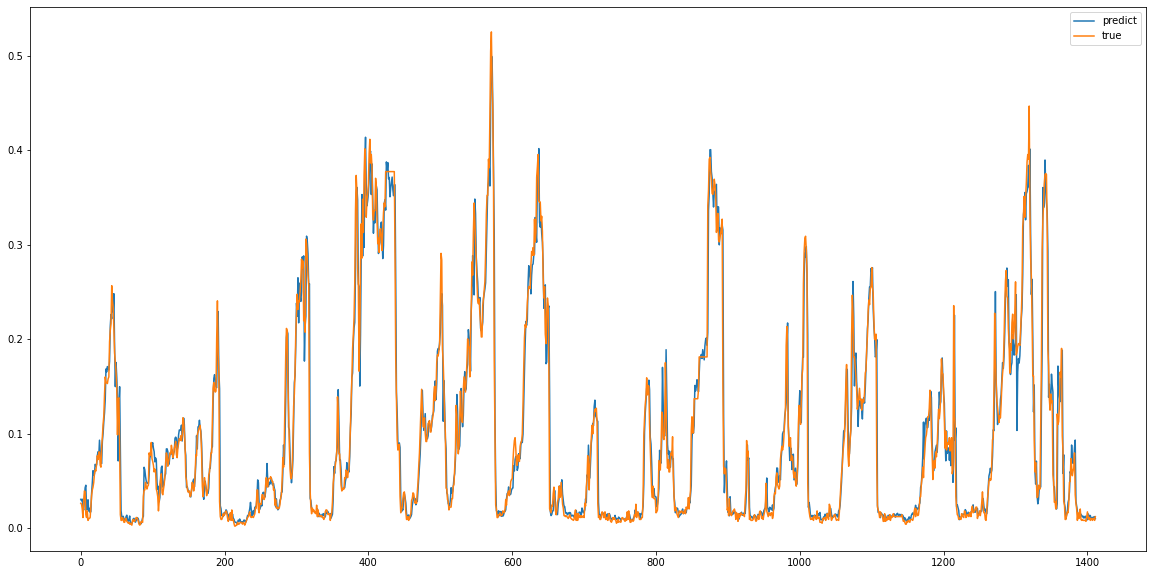

In [35]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = xgb_model1.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

### lightgbm

In [36]:
from lightgbm import LGBMRegressor

In [37]:
lgbm_r = LGBMRegressor(n_estimators = 100, random_state = 30)

In [38]:
lgbm_r.fit(train_x, train_y,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)

/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.916411	training's l2: 0.00687904	valid_1's auc: 1	valid_1's l2: 0.00930152
[2]	training's auc: 0.933952	training's l2: 0.00567915	valid_1's auc: 1	valid_1's l2: 0.00766091
[3]	training's auc: 0.959704	training's l2: 0.004706	valid_1's auc: 1	valid_1's l2: 0.00632096
[4]	training's auc: 0.959704	training's l2: 0.0039161	valid_1's auc: 1	valid_1's l2: 0.00523512
[5]	training's auc: 0.959704	training's l2: 0.00327597	valid_1's auc: 1	valid_1's l2: 0.00434983
[6]	training's auc: 0.959704	training's l2: 0.00275526	valid_1's auc: 1	valid_1's l2: 0.00363811
[7]	training's auc: 0.959704	training's l2: 0.00233295	valid_1's auc: 1	valid_1's l2: 0.00306259
[8]	training's auc: 0.959704	training's l2: 0.00198987	valid_1's auc: 1	valid_1's l2: 0.00259635
[9]	training's auc: 0.959704	training's l2: 0.00171141	valid_1's auc: 1	valid_1's l2: 0.00221121
[10]	training's auc: 0.97406	training's l2: 0.00148521	valid_1's auc: 1	valid_1's l2: 0.00190276
[11]	training's auc: 0.97406	trai

LGBMRegressor(random_state=30)

In [39]:
predict = lgbm_r.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = lgbm_r.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.24221444147150173
Test RMSE : 0.022270926315577
Test MAE : 0.012249260203710787
Test MSE : 0.0004959941589538601


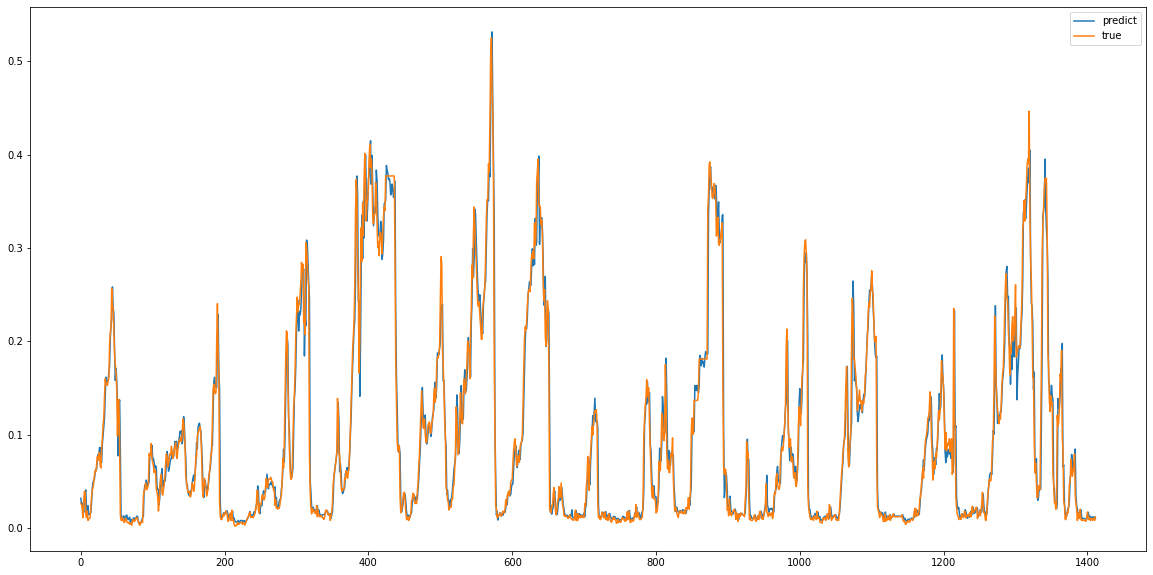

In [40]:

from sklearn.metrics import *

from matplotlib import pyplot
yhat = lgbm_r.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()


## r_f

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [42]:
params = {
    'n_estimators':(100, 500),
    'max_depth' : (5, 30),
    'min_samples_leaf' : (3, 10),
    'min_samples_split' : (3, 10)
}

In [43]:
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 30), 'min_samples_leaf': (3, 10),
                         'min_samples_split': (3, 10),
                         'n_estimators': (100, 500)})

In [44]:
print("GridSearchCV best params:", grid_cv.best_params_)

GridSearchCV best params: {'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}


In [45]:
predict = grid_cv.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = grid_cv.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.23757482263542215
Test RMSE : 0.022662228841298333
Test MAE : 0.012175952494675756
Test MSE : 0.0005135766160553742


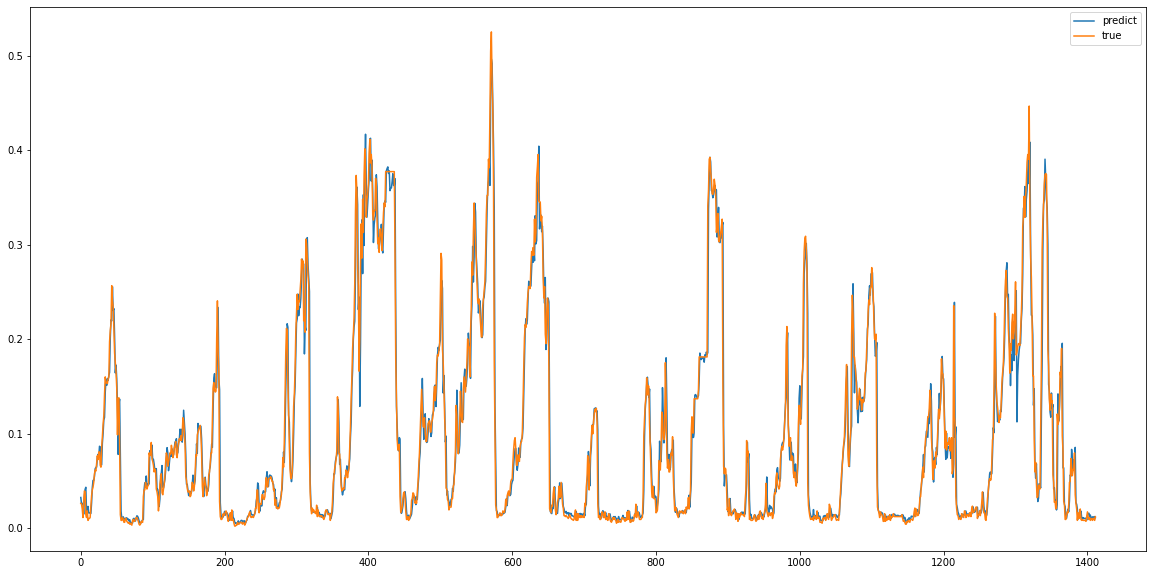

In [46]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = grid_cv.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()